In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

### Lectura del dataset original y creacion de nuevas variables

In [2]:
df = pd.read_csv('ventas_producto_pdv.zip', parse_dates = [7])
df = df.rename(columns={"categoria": "Categoria"})

In [3]:
#Variable totalkg para homogenizar unidades de medida para cada presentación
df['totalkg'] = df['unidadkg']*df['cantidad_pedida']
#Creamos variable time: %y.%m
df['time'] = df['anio'].astype(str)+'.'+df['mes'].astype(str).str.zfill(2)

### Detección de Datos Faltantes

<AxesSubplot:>

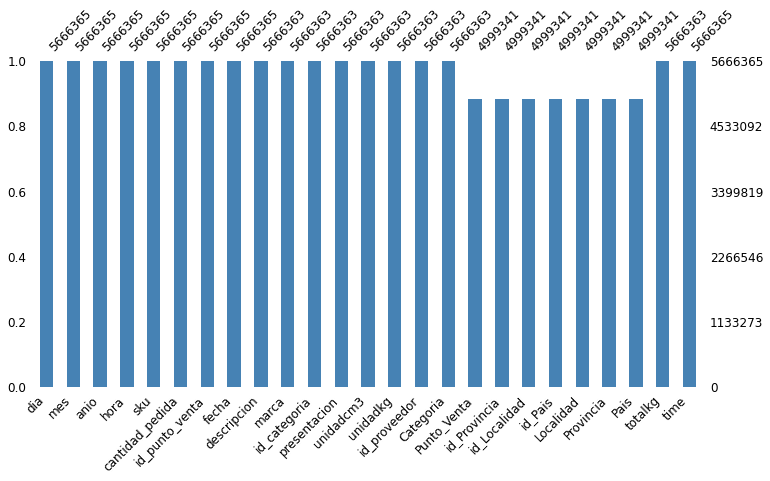

In [4]:
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')

In [8]:
#msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])
#sorted = df.sort_values("Localidad")
#msno.matrix(sorted,figsize=(12, 6), fontsize=12, color=[0.5,0,0])

### Eliminación de valores erroneos o que no son de interes

In [4]:
#Filtrar los nan de provincia, localidad y pais (son 667,024)
df_filter = df.dropna(subset=['Localidad'])
df_filter #total base de datos 4,999,341

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha,descripcion,marca,...,Categoria,Punto_Venta,id_Provincia,id_Localidad,id_Pais,Localidad,Provincia,Pais,totalkg,time
2886,2,1,2018,15:03:30.0000000,266,1.0,100001,2018-01-02,FRUTXX-XX-X-XXXRIDO,GRIDO,...,06 - SABORES AL AGUA,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Montecristo,Córdoba,Argentina,7.80,2018.01
2887,2,1,2018,15:03:30.0000000,263,6.0,100001,2018-01-02,LIMOXX-XX-X-XXXRIDO,GRIDO,...,06 - SABORES AL AGUA,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Montecristo,Córdoba,Argentina,46.80,2018.01
2888,2,1,2018,15:03:30.0000000,861,1.0,100001,2018-01-02,MARAXX-XX-X-XXXRIDO,GRIDO,...,06 - SABORES AL AGUA,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Montecristo,Córdoba,Argentina,7.80,2018.01
2889,2,1,2018,15:03:30.0000000,1103,3.0,100001,2018-01-02,NARAXX-XX-X-XXXRIDO,GRIDO,...,06 - SABORES AL AGUA,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Montecristo,Córdoba,Argentina,23.40,2018.01
2890,2,1,2018,15:03:30.0000000,1695,3.0,100001,2018-01-02,BANAXX-XX-X-XXXRIDO,GRIDO,...,07 - SABORES COMUNES,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Montecristo,Córdoba,Argentina,23.40,2018.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666360,31,12,2019,15:27:50.2900000,3121,2.0,100653-1,2019-12-31,PANTXX-XX-X-XXXT.40,GRIDO,...,0001 - INDUMENTARIA,ALTXXX-XX-XX II,5.0,2.0,1.0,Córdoba,Córdoba,Argentina,0.00,2019.12
5666361,31,12,2019,15:27:50.2900000,3051,6.0,100653-1,2019-12-31,DISPXX-XX-X-XXXONAL,SIN DEFINIR,...,0006 - EQUIPOS,ALTXXX-XX-XX II,5.0,2.0,1.0,Córdoba,Córdoba,Argentina,2.82,2019.12
5666362,31,12,2019,17:56:45.8570000,1244,1.0,100538,2019-12-31,EXHIXX-XX-X-XXXCUPS,SIN DEFINIR,...,"0005 - CARTELERIA, INSTITUCIONALES Y PLOTEOS",JORXXX-XX-XXOBA,17.0,4063.0,1.0,San Juan,San Juan,Argentina,0.44,2019.12
5666363,31,12,2019,17:56:45.8570000,1966,3.0,100538,2019-12-31,TAPAXX-XX-X-XXXNOX.,SIN DEFINIR,...,0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE ...,JORXXX-XX-XXOBA,17.0,4063.0,1.0,San Juan,San Juan,Argentina,0.00,2019.12


In [5]:
df_filter = df_filter.set_index(['time','sku','Categoria','Localidad','Provincia','totalkg','cantidad_pedida','unidadkg','presentacion', 'marca']).reset_index()

#Sacamos totalkg con valores negativos (son 2 casos)
df_filter = df_filter[df_filter['totalkg']>=0]
df_filter #total base de datos 4,999,339

,time,sku,Categoria,Localidad,Provincia,totalkg,cantidad_pedida,unidadkg,presentacion,marca,...,fecha,descripcion,id_categoria,unidadcm3,id_proveedor,Punto_Venta,id_Provincia,id_Localidad,id_Pais,Pais
0,2018.01,266,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Baldes,GRIDO,...,2018-01-02,FRUTXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
1,2018.01,263,06 - SABORES AL AGUA,Montecristo,Córdoba,46.80,6.0,7.80,Baldes,GRIDO,...,2018-01-02,LIMOXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
2,2018.01,861,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Kilogramos,GRIDO,...,2018-01-02,MARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
3,2018.01,1103,06 - SABORES AL AGUA,Montecristo,Córdoba,23.40,3.0,7.80,Unidades,GRIDO,...,2018-01-02,NARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
4,2018.01,1695,07 - SABORES COMUNES,Montecristo,Córdoba,23.40,3.0,7.80,Baldes,GRIDO,...,2018-01-02,BANAXX-XX-X-XXXRIDO,44.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999336,2019.12,3121,0001 - INDUMENTARIA,Córdoba,Córdoba,0.00,2.0,0.00,Unidades,GRIDO,...,2019-12-31,PANTXX-XX-X-XXXT.40,96.0,0.160,3.0,ALTXXX-XX-XX II,5.0,2.0,1.0,Argentina
4999337,2019.12,3051,0006 - EQUIPOS,Córdoba,Córdoba,2.82,6.0,0.47,Unidades,SIN DEFINIR,...,2019-12-31,DISPXX-XX-X-XXXONAL,97.0,0.500,3.0,ALTXXX-XX-XX II,5.0,2.0,1.0,Argentina
4999338,2019.12,1244,"0005 - CARTELERIA, INSTITUCIONALES Y PLOTEOS",San Juan,San Juan,0.44,1.0,0.44,Unidades,SIN DEFINIR,...,2019-12-31,EXHIXX-XX-X-XXXCUPS,95.0,0.133,3.0,JORXXX-XX-XXOBA,17.0,4063.0,1.0,Argentina
4999339,2019.12,1966,0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE ...,San Juan,San Juan,0.00,3.0,0.00,No Asignada,SIN DEFINIR,...,2019-12-31,TAPAXX-XX-X-XXXNOX.,111.0,1.000,3.0,JORXXX-XX-XXOBA,17.0,4063.0,1.0,Argentina


In [6]:
#Sacamos totalkg con valores iguales a 0.
df_filter = df_filter[df_filter['totalkg']!=0]
df_filter #Total base de datos 4,760,848

,time,sku,Categoria,Localidad,Provincia,totalkg,cantidad_pedida,unidadkg,presentacion,marca,...,fecha,descripcion,id_categoria,unidadcm3,id_proveedor,Punto_Venta,id_Provincia,id_Localidad,id_Pais,Pais
0,2018.01,266,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Baldes,GRIDO,...,2018-01-02,FRUTXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
1,2018.01,263,06 - SABORES AL AGUA,Montecristo,Córdoba,46.80,6.0,7.80,Baldes,GRIDO,...,2018-01-02,LIMOXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
2,2018.01,861,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Kilogramos,GRIDO,...,2018-01-02,MARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
3,2018.01,1103,06 - SABORES AL AGUA,Montecristo,Córdoba,23.40,3.0,7.80,Unidades,GRIDO,...,2018-01-02,NARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
4,2018.01,1695,07 - SABORES COMUNES,Montecristo,Córdoba,23.40,3.0,7.80,Baldes,GRIDO,...,2018-01-02,BANAXX-XX-X-XXXRIDO,44.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999333,2019.12,1939,0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE ...,La Rioja,La Rioja,1.20,3.0,0.40,No Asignada,SIN DEFINIR,...,2019-12-31,TRAVXX-XX-X-XXXM 46,111.0,0.200,3.0,PEAXXX-XX-XX LR,11.0,3061.0,1.0,Argentina
4999334,2019.12,1937,0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE ...,La Rioja,La Rioja,1.92,8.0,0.24,No Asignada,SIN DEFINIR,...,2019-12-31,TRAVXX-XX-X-XXXGRIS,111.0,0.133,3.0,PEAXXX-XX-XX LR,11.0,3061.0,1.0,Argentina
4999335,2019.12,3136,0001 - INDUMENTARIA,Córdoba,Córdoba,0.90,3.0,0.30,Unidades,GRIDO,...,2019-12-31,DELAXX-XX-X-XXXRIDO,96.0,0.100,3.0,ALTXXX-XX-XX II,5.0,2.0,1.0,Argentina
4999337,2019.12,3051,0006 - EQUIPOS,Córdoba,Córdoba,2.82,6.0,0.47,Unidades,SIN DEFINIR,...,2019-12-31,DISPXX-XX-X-XXXONAL,97.0,0.500,3.0,ALTXXX-XX-XX II,5.0,2.0,1.0,Argentina


In [7]:
#Listado de Categorias NO comestibles
listado_0 = ['0010 - PRODUCTOS PROMOCIONALES','0001 - GRIDO MARKET','0006 - PRODUCTOS COMPOSTABLES /BIODEGRADABLES' ,'07 - ACCESORIOS, UTENSILIOS Y REPUESTOS ','0005 - ENVASES TERMICOS Y VASOS', '06 - PRODUCTOS DE LIMPIEZA ', '0006 - EQUIPOS', '0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE FRIO', '0008 - MUEBLES', '09 - DISPENSER', '0005 - CARTELERIA, INSTITUCIONALES Y PLOTEOS', '0010 - PACKAGING', '0001 - INDUMENTARIA ', '0009 - DESCARTABLES ', '0012 - MATERIAL MKT', '19 - MATERIAS PRIMAS']

In [8]:
#Sacamos categorias no comestibles (según listado definido)
df_filter = df_filter[~df_filter['Categoria'].isin(listado_0)]
df_filter #total base de datos 4,307,546

,time,sku,Categoria,Localidad,Provincia,totalkg,cantidad_pedida,unidadkg,presentacion,marca,...,fecha,descripcion,id_categoria,unidadcm3,id_proveedor,Punto_Venta,id_Provincia,id_Localidad,id_Pais,Pais
0,2018.01,266,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Baldes,GRIDO,...,2018-01-02,FRUTXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
1,2018.01,263,06 - SABORES AL AGUA,Montecristo,Córdoba,46.80,6.0,7.80,Baldes,GRIDO,...,2018-01-02,LIMOXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
2,2018.01,861,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Kilogramos,GRIDO,...,2018-01-02,MARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
3,2018.01,1103,06 - SABORES AL AGUA,Montecristo,Córdoba,23.40,3.0,7.80,Unidades,GRIDO,...,2018-01-02,NARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
4,2018.01,1695,07 - SABORES COMUNES,Montecristo,Córdoba,23.40,3.0,7.80,Baldes,GRIDO,...,2018-01-02,BANAXX-XX-X-XXXRIDO,44.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970881,2019.12,1542,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",Córdoba,Córdoba,2.29,1.0,2.29,No Asignada,SIN DEFINIR,...,2019-12-31,VASOXX-XX-X-XXXnid.,65.0,1.429,3.0,PLAXXX-XX-XXAÑA,5.0,2.0,1.0,Argentina
4970885,2019.12,613,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",Córdoba,Córdoba,25.86,2.0,12.93,Unidades,SIN DEFINIR,...,2019-12-31,LECHXX-XX-X-XXXCTEO,68.0,1.111,3.0,PLAXXX-XX-XXAÑA,5.0,2.0,1.0,Argentina
4970898,2019.12,1112,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",Córdoba,Córdoba,5.90,1.0,5.90,Unidades,SIN DEFINIR,...,2019-12-31,CUCUXX-XX-X-XXXUnid,65.0,3.330,3.0,SMAXXX-XX-XXATA,5.0,2.0,1.0,Argentina
4970904,2019.12,613,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",Córdoba,Córdoba,12.93,1.0,12.93,Unidades,SIN DEFINIR,...,2019-12-31,LECHXX-XX-X-XXXCTEO,68.0,1.111,3.0,SMAXXX-XX-XXATA,5.0,2.0,1.0,Argentina


### Filtrado de outliers

12) Determine si hay outliers en las variables seleccionadas. Realice este análisis por distintas variables como por ejemplo totalkg por provincia para cada mes. Referencia a metodos de detección de outliers http://colingorrie.github.io/outlier-detection.html

In [9]:
#Detección a través de Z Score
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)
#Detección a través de Modified Z Score
def outliers_modified_z_score(ys):
  threshold = 3.5
  median_y = np.median(ys)
  median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
  modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                        for y in ys]
  return np.where(np.abs(modified_z_scores) > threshold)
#Detección a través de IQR
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [10]:
#Estadistica descriptiva de totalkg
df_describe = df_filter.loc[:, ['time','Localidad','Provincia','sku','totalkg']]
df_describe['totalkg'] = df_describe['totalkg'].round()
df_describe[['totalkg']].describe()

,totalkg
count,4.307546e+06
mean,2.870813e+01
std,2.194043e+02
min,0.000000e+00
25%,8.000000e+00
50%,1.600000e+01
75%,2.900000e+01
max,4.319870e+05


In [11]:
#Detección por Z Score
df_zscore = outliers_z_score(df_filter['totalkg'])
df_zscore

(array([   3502,    7231,    7471, ..., 4291005, 4302250, 4304246],
       dtype=int64),)

In [12]:
#Detección por Modified Z Score
df_zscorem = outliers_modified_z_score(df_filter['totalkg'])
df_zscorem

(array([     48,      49,      74, ..., 4307470, 4307472, 4307491],
       dtype=int64),)

In [13]:
#Detección por IQR
df_iqr = outliers_iqr(df_filter['totalkg'])
df_iqr

(array([     48,      49,      74, ..., 4307343, 4307380, 4307472],
       dtype=int64),)

In [ ]:
#Boxplot: totalkg por Provincia
fig = px.box(df_filter, x="Provincia", y="totalkg") 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg para 2018
df_2018 = df_filter[['anio','mes','Provincia','Localidad','totalkg','sku']]
df_2018 = df_2018[df_2018['anio']==2018]
df_2018 = df_2018[['Provincia','mes','totalkg']]
df_2018['mes'] = 'Mes ' + df_2018['mes'].astype(str)

fig = px.box(df_2018, x="Provincia", y="totalkg") 
fig.update_layout(template='plotly_white' ) 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg por Provincia para 2018
fig = px.box(df_2018, x="Provincia", y="totalkg",color='Provincia') 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg para el 2019
df_2019 = df_filter[['anio','mes','Provincia','Localidad','totalkg','sku']]
df_2019 = df_2019[df_2019['anio']==2019]
df_2019 = df_2019[['Provincia','mes','totalkg']]
df_2019['mes'] = 'Mes ' + df_2019['mes'].astype(str)

fig = px.box(df_2019, x="mes", y="totalkg") 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg por Provincia para 2019
fig = px.box(df_2019, x="mes", y="totalkg",color='Provincia') 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Estadistica descriptiva de totalkg
df_describe = df_new.loc[:, ['time','Localidad','Provincia','sku','totalkg']]
df_describe['totalkg'] = df_describe['totalkg'].round()
df_describe.describe()

Se detectan outliers en la variable totalkg para todas las relaciones analizadas con las demas variables. A continuación se quitarán los outliers:

In [14]:
#Metodo IQR 
q1 = df_filter["totalkg"].quantile(0.25) 
q3 = df_filter["totalkg"].quantile(0.75) 
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)

df_iqr = df_filter[(df_filter["totalkg"] < upper_bound)&(df_filter["totalkg"] > lower_bound)]

In [15]:
#Percentiles de 0.99 y 0.01
p_max = df_filter["totalkg"].quantile(0.99) 
p_min = df_filter["totalkg"].quantile(0.01)

df_new = df_filter[(df_filter["totalkg"] < p_max)&(df_filter["totalkg"] > p_min)]

Nos quedamos con la segunda opción para quitar outliers de la base de datos, dado que la anterior opción nos quita datos que consideramos que tienen que estar, principalmente valores altos, pero que probablemente no son datos erroneos si no pedidos correspondientes al verano.

Análisis exploratorio de totalkg sin outliers.

In [ ]:
#Boxplot: totalkg por Provincia sin Outliers
fig = px.box(df_new, x="Provincia", y="totalkg") 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg para 2018 sin Outliers
df_2018_iqr = df_new[['anio','mes','Provincia','Localidad','totalkg','sku']]
df_2018_iqr = df_2018_iqr[df_2018_iqr['anio']==2018]
df_2018_iqr = df_2018_iqr[['Provincia','mes','totalkg']]
df_2018_iqr = df_2018_iqr.sort_values(by=['mes'])
df_2018_iqr['mes'] = 'Mes ' + df_2018_iqr['mes'].astype(str)

fig = px.box(df_2018_iqr, x="mes", y="totalkg") 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg para el 2019 sin Outliers
df_2019_iqr = df_new[['anio','mes','Provincia','Localidad','totalkg','sku']]
df_2019_iqr = df_2019_iqr[df_2019_iqr['anio']==2019]
df_2019_iqr = df_2019_iqr[['Provincia','mes','totalkg']]
df_2019_iqr = df_2019_iqr.sort_values(by=['mes'])
df_2019_iqr['mes'] = 'Mes ' + df_2019_iqr['mes'].astype(str)

fig = px.box(df_2019_iqr, x="mes", y="totalkg") 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

In [ ]:
#Boxplot: totalkg por Provincia para el 2018
df_2018_I_iqr = df_2018_iqr[(df_2018_iqr['mes']=='Mes 1')]
fig = px.box(df_2018_I_iqr, x="mes", y="totalkg", color='Provincia') 
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

### Datset final y guardado

In [16]:
df_new #Total base de datos 4,219,560 

,time,sku,Categoria,Localidad,Provincia,totalkg,cantidad_pedida,unidadkg,presentacion,marca,...,fecha,descripcion,id_categoria,unidadcm3,id_proveedor,Punto_Venta,id_Provincia,id_Localidad,id_Pais,Pais
0,2018.01,266,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Baldes,GRIDO,...,2018-01-02,FRUTXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
1,2018.01,263,06 - SABORES AL AGUA,Montecristo,Córdoba,46.80,6.0,7.80,Baldes,GRIDO,...,2018-01-02,LIMOXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
2,2018.01,861,06 - SABORES AL AGUA,Montecristo,Córdoba,7.80,1.0,7.80,Kilogramos,GRIDO,...,2018-01-02,MARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
3,2018.01,1103,06 - SABORES AL AGUA,Montecristo,Córdoba,23.40,3.0,7.80,Unidades,GRIDO,...,2018-01-02,NARAXX-XX-X-XXXRIDO,43.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
4,2018.01,1695,07 - SABORES COMUNES,Montecristo,Córdoba,23.40,3.0,7.80,Baldes,GRIDO,...,2018-01-02,BANAXX-XX-X-XXXRIDO,44.0,0.800,2.0,MONXXX-XX-XXSTO,5.0,1890.0,1.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970879,2019.12,1112,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",Córdoba,Córdoba,23.60,4.0,5.90,Unidades,SIN DEFINIR,...,2019-12-31,CUCUXX-XX-X-XXXUnid,65.0,3.330,3.0,PLAXXX-XX-XXAÑA,5.0,2.0,1.0,Argentina
4970881,2019.12,1542,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",Córdoba,Córdoba,2.29,1.0,2.29,No Asignada,SIN DEFINIR,...,2019-12-31,VASOXX-XX-X-XXXnid.,65.0,1.429,3.0,PLAXXX-XX-XXAÑA,5.0,2.0,1.0,Argentina
4970885,2019.12,613,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",Córdoba,Córdoba,25.86,2.0,12.93,Unidades,SIN DEFINIR,...,2019-12-31,LECHXX-XX-X-XXXCTEO,68.0,1.111,3.0,PLAXXX-XX-XXAÑA,5.0,2.0,1.0,Argentina
4970898,2019.12,1112,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",Córdoba,Córdoba,5.90,1.0,5.90,Unidades,SIN DEFINIR,...,2019-12-31,CUCUXX-XX-X-XXXUnid,65.0,3.330,3.0,SMAXXX-XX-XXATA,5.0,2.0,1.0,Argentina


In [20]:
# Opciones de compresión para guardar datafrme resultante
compression_opts = dict(method='zip',archive_name='dataset_new.csv')  

# Grabamos dataframe resultante
df_new.to_csv('dataset_new.zip', index=False,compression=compression_opts)  